In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
raw_train_data = pd.read_csv("../input/titanic/train.csv")
raw_train_data
raw_test_data = pd.read_csv('../input/titanic/test.csv')

In [3]:
print(raw_test_data.isnull().sum().sum())

414


In [4]:
raw_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data_before_processing = raw_train_data.drop('Cabin',axis=1)
train_data_before_processing = train_data_before_processing.drop('Name',axis=1)
train_data_before_processing = train_data_before_processing.drop('Ticket',axis=1)
train_data_before_processing = train_data_before_processing.drop('PassengerId',axis=1)

test_data_before_processing = raw_test_data.drop('Cabin',axis=1)
test_data_before_processing = test_data_before_processing.drop('Name',axis=1)
test_data_before_processing = test_data_before_processing.drop('Ticket',axis=1)
test_data_before_processing = test_data_before_processing.drop('PassengerId',axis=1)

test_data_before_processing 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='count'>

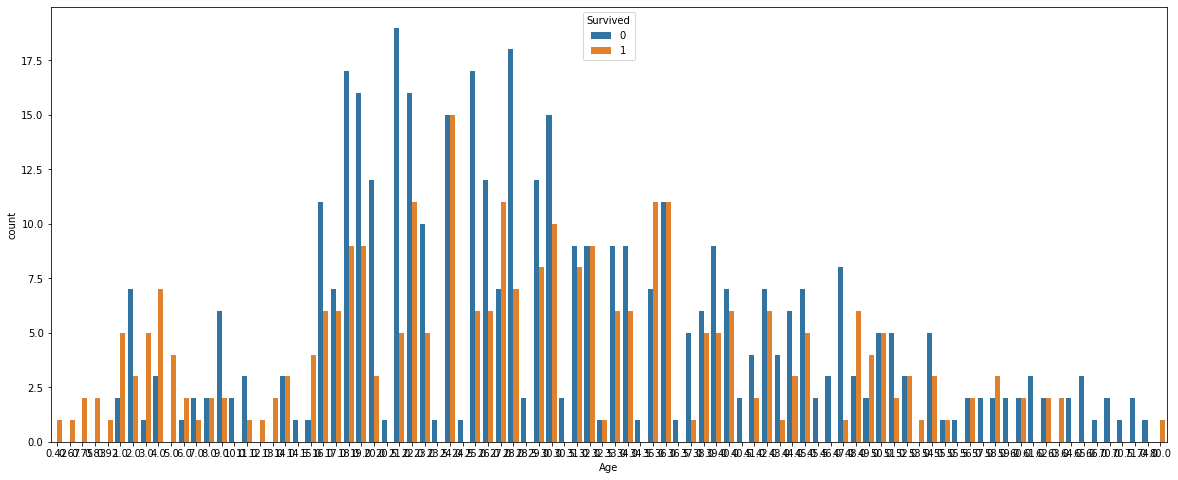

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data = raw_train_data , hue='Survived')

In [7]:
train_data_before_processing['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_data_before_processing1 = train_data_before_processing.sort_values('Survived',ascending=False)
train_data_before_processing1.drop(train_data_before_processing1.tail(207).index,
        inplace = True)
train_data_before_processing1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,male,4.0,0,2,81.8583,S
319,1,1,female,40.0,1,1,134.5000,C
334,1,1,female,NaN,1,0,133.6500,S
330,1,3,female,NaN,2,0,23.2500,Q
329,1,1,female,16.0,0,1,57.9792,C
...,...,...,...,...,...,...,...,...
70,0,2,male,32.0,0,0,10.5000,S
72,0,2,male,21.0,0,0,73.5000,S
129,0,3,male,45.0,0,0,6.9750,S
103,0,3,male,33.0,0,0,8.6542,S


In [9]:
train_data_before_processing1 = train_data_before_processing1.sample(frac=1).reset_index(drop=True)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing

In [10]:
train_data_before_processing1['Sex'] = train_data_before_processing1['Sex'].map({'male':0,'female':1})
train_data_before_processing1

test_data_before_processing1['Sex'] = test_data_before_processing1['Sex'].map({'male':0,'female':1})

In [11]:
train_data_before_processing1['Age'].describe()

count    557.000000
mean      29.309102
std       14.516729
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
train_data_before_processing1['Age'] = train_data_before_processing1['Age'].fillna(value = train_data_before_processing1['Age'].mean())

test_data_before_processing1['Age'] = test_data_before_processing1['Age'].fillna(value = 29)

In [13]:
print(test_data_before_processing1.isnull().sum().sum())

1


In [14]:
test_data_before_processing1['Fare'].describe()
test_data_before_processing1['Fare']=test_data_before_processing1['Fare'].fillna(value=0.069540)

In [15]:
train_dummy_Embarked = pd.get_dummies(train_data_before_processing1['Embarked'])
train_dummy_Embarked

test_dummy_Embarked = pd.get_dummies(test_data_before_processing1['Embarked'])
test_dummy_Embarked

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [16]:
train_data_before_processing1 = pd.concat([train_data_before_processing1,train_dummy_Embarked], axis=1)
train_data_before_processing1

test_data_before_processing1 = pd.concat([test_data_before_processing1,test_dummy_Embarked], axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,3,0,34.5,0,0,7.8292,Q,0,1,0
1,3,1,47.0,1,0,7.0000,S,0,0,1
2,2,0,62.0,0,0,9.6875,Q,0,1,0
3,3,0,27.0,0,0,8.6625,S,0,0,1
4,3,1,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,S,0,0,1
414,1,1,39.0,0,0,108.9000,C,1,0,0
415,3,0,38.5,0,0,7.2500,S,0,0,1
416,3,0,29.0,0,0,8.0500,S,0,0,1


In [17]:
train_data_before_processing1 = train_data_before_processing1.drop('Embarked',axis=1)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing1.drop('Embarked',axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,29.0,0,0,8.0500,0,0,1


In [18]:
print(train_data_before_processing1.isnull().sum().sum())

0


In [19]:
test_data_before_processing1.shape

(418, 9)

In [20]:
q = train_data_before_processing1['SibSp'].quantile(1.0)
train_data_before_processing2 = train_data_before_processing1[train_data_before_processing1['SibSp']<q]

q2 = train_data_before_processing2['Parch'].quantile(1.0)
train_data_before_processing3 = train_data_before_processing2[train_data_before_processing1['Parch']<q2]

q3 = train_data_before_processing3['Fare'].quantile(1.0)
train_data_before_processing4 = train_data_before_processing3[train_data_before_processing1['Fare']<q3]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
print(train_data_before_processing4.isnull().sum().sum())

0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(train_data_before_processing4[['Age','Fare']])

MinMaxScaler()

In [65]:
train_scaled_data1 = scaler.transform(train_data_before_processing4[['Age','Fare']])

In [64]:
scaler.fit(test_data_before_processing1[['Age','Fare']])
test_scaled_data1 = scaler.transform(test_data_before_processing1[['Age','Fare']])

In [27]:
train_scaled_data2 = pd.DataFrame.from_records(train_scaled_data1, columns =['Age','Fare'])
train_scaled_data2

test_scaled_data2 = pd.DataFrame.from_records(test_scaled_data1, columns =['Age','Fare'])
test_scaled_data2

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984
...,...,...
413,0.380193,0.015713
414,0.512066,0.212559
415,0.505473,0.014151
416,0.380193,0.015713


In [28]:
train_scaled_data2.columns

Index(['Age', 'Fare'], dtype='object')

In [29]:
print(train_scaled_data2.isnull().sum().sum())

0


In [30]:
train_scaled_data = train_data_before_processing4.copy()
train_scaled_data[['Age','Fare']] = train_scaled_data1
print(train_scaled_data.isnull().sum().sum())

test_scaled_data = test_data_before_processing1
test_scaled_data.loc[:, ('Age','Fare')] = test_scaled_data2

0


In [31]:
print(train_scaled_data.isnull().sum().sum())

0


In [32]:
test_scaled_data

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,0.452723,0,0,0.015282,0,1,0
1,3,1,0.617566,1,0,0.013663,0,0,1
2,2,0,0.815377,0,0,0.018909,0,1,0
3,3,0,0.353818,0,0,0.016908,0,0,1
4,3,1,0.287881,1,1,0.023984,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,0.380193,0,0,0.015713,0,0,1
414,1,1,0.512066,0,0,0.212559,1,0,0
415,3,0,0.505473,0,0,0.014151,0,0,1
416,3,0,0.380193,0,0,0.015713,0,0,1


In [33]:
train_scaled_data.corr()['Survived'].sort_values()

Pclass     -0.354868
S          -0.153022
Age        -0.063563
Q           0.003412
SibSp       0.005320
Parch       0.097630
C           0.163854
Fare        0.298571
Sex         0.555624
Survived    1.000000
Name: Survived, dtype: float64

In [34]:
train_scaled_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [36]:
inputs = train_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]
targets = train_scaled_data['Survived']
x_test = test_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]

In [37]:
test_scaled_data.shape

(418, 9)

In [38]:
from sklearn.model_selection import train_test_split
train_inputs,val_inputs,train_targets,val_targets = train_test_split(inputs,targets,train_size=0.8,random_state=360)

In [39]:
val_inputs.shape

(135, 5)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [41]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=25)

In [43]:
print(x_test.isnull().sum().sum())

0


In [44]:
print(train_inputs.isnull().sum().sum())

0


In [45]:
model.fit(x=train_inputs,y=train_targets,
          epochs=600,
          validation_data=(val_inputs,val_targets),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 1s 38ms/step - loss: 0.8204 - val_loss: 0.7319
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.8141 - val_loss: 0.7059
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7226 - val_loss: 0.6904
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7307 - val_loss: 0.6782
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7032 - val_loss: 0.6700
Epoch 6/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7088 - val_loss: 0.6628
Epoch 7/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6835 - val_loss: 0.6575
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6472 - val_loss: 0.6518
Epoch 9/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6816 - val_loss: 0.6470
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6376 - val_loss: 0.6414
Epoch 11

<AxesSubplot:>

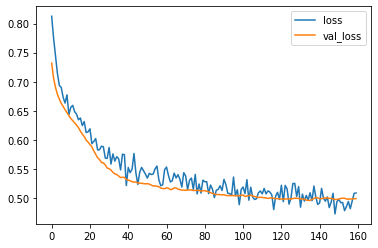

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [47]:
y_test = pd.read_csv('../input/titanic/gender_submission.csv')
Y_test = y_test.drop('PassengerId',axis=1)
Y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [48]:
x_test.shape

(418, 5)

In [63]:
pred_result = model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred_result))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.96      0.97      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.97       418
weighted avg       0.98      0.98      0.98       418



In [51]:
print(confusion_matrix(Y_test,pred_result))

[[260   6]
 [  4 148]]


In [52]:
prediction = pd.DataFrame(pred_result,columns=['Survived'])
prediction = pd.concat([y_test['PassengerId'],prediction],axis=1)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
prediction.to_csv('Prediction',index=False)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)

In [56]:
model2.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=1, random_state=0)

In [57]:
print(x_test.isnull().sum().sum())

0


In [58]:
prediction2 = model2.predict(x_test)
prediction2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [60]:
prediction2 = pd.DataFrame(prediction2,columns=['Survived'])
prediction2 = pd.concat([y_test['PassengerId'],prediction2],axis=1)
prediction2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
prediction2.to_csv('Prediction3.0',index=False)